In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import dcor
import shap

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('PtPdAuIr_tafel.csv')
unwanted_columns = ['Run #', 'Sample #', 'iR drop (Ω)', 'overP0']
df = df.drop(unwanted_columns, axis=1)
print(df)

selected_columns_X = ['Pt', 'Pd', 'Au', 'Ir']
X = df[selected_columns_X]
selected_columns_y = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
y = df[selected_columns_y]

         Pt      Pd      Au      Ir  Oonset  Omax  Omin  Tafel slope
0    0.3194  0.3605  0.2653  0.0549    1.17  1.26  1.41         5.56
1    0.2331  0.3578  0.3196  0.0895    1.18  1.28  1.43         5.05
2    0.1772  0.3511  0.3343  0.1374    1.19  1.34  1.44         4.00
3    0.1396  0.3413  0.3158  0.2032    1.20  1.34  1.46         3.70
4    0.1026  0.3213  0.2827  0.2934    1.20  1.35  1.48         3.34
..      ...     ...     ...     ...     ...   ...   ...          ...
102  0.1330  0.0667  0.6788  0.1215    1.27  1.36  1.46         5.82
103  0.0874  0.0536  0.6995  0.1595    1.23  1.36  1.51         4.31
104  0.0609  0.0549  0.6538  0.2304    1.24  1.37  1.48         5.62
105  0.0507  0.0578  0.5548  0.3367    1.20  1.37  1.52         4.19
106  0.4490  0.0801  0.4301  0.0408    1.19  1.27  1.41         4.67

[107 rows x 8 columns]


In [5]:
#Test ML models
linear=0; rf=0; dt=0; knn=0; svr=0; gb=0; ab = 0;
#n-fold mse
n = 20
for i in range (0,n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create a multioutput regression model
    modelLinear = MultiOutputRegressor(LinearRegression())
    modelLinear.fit(X_train, y_train)
    predictions = modelLinear.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    linear+= mse
    #print(f'Mean Squared Error (Linear): {mse}')

    # Create a multioutput regression model
    modelRF = MultiOutputRegressor(RandomForestRegressor())
    modelRF.fit(X_train, y_train)
    predictions = modelRF.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    rf+=mse
    #print(f'Mean Squared Error (RF): {mse}')

    # Create a multioutput regression model
    modelDT = MultiOutputRegressor(DecisionTreeRegressor())
    modelDT.fit(X_train, y_train)
    predictions = modelDT.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    dt+=mse
    #print(f'Mean Squared Error (DT): {mse}')

    # Create a multioutput regression model
    modelKNN = MultiOutputRegressor(KNeighborsRegressor())
    modelKNN.fit(X_train, y_train)
    predictions = modelKNN.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    knn+=mse
    #print(f'Mean Squared Error (KNN): {mse}')

    # Create a multioutput regression model
    modelSVR = MultiOutputRegressor(SVR())
    modelSVR.fit(X_train, y_train)
    predictions = modelSVR.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    svr+=mse
    #print(f'Mean Squared Error (SVR): {mse}')

    # Create a multioutput regression model
    modelGB = MultiOutputRegressor(GradientBoostingRegressor())
    modelGB.fit(X_train, y_train)
    predictions = modelGB.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    gb+=mse
    #print(f'Mean Squared Error (GB): {mse}')

    # Create a multioutput regression model
    modelAB = MultiOutputRegressor(AdaBoostRegressor())
    modelAB.fit(X_train, y_train)
    predictions = modelAB.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    ab+=mse
    #print(f'Mean Squared Error (AB): {mse}')
    
print("Lower error means a better fit.")
print(f'Mean Squared Error (Linear): {linear/n}')
print(f'Mean Squared Error (RF): {rf/n}')
print(f'Mean Squared Error (DT): {dt/n}')
print(f'Mean Squared Error (KNN): {knn/n}')
print(f'Mean Squared Error (SVR): {svr/n}')
print(f'Mean Squared Error (GB): {gb/n}')
print(f'Mean Squared Error (AB): {ab/n}')

Lower error means a better fit.
Mean Squared Error (Linear): 0.397973645607871
Mean Squared Error (RF): 0.22462841064772734
Mean Squared Error (DT): 0.4083672159090909
Mean Squared Error (KNN): 0.2570668681818181
Mean Squared Error (SVR): 0.21730251876496856
Mean Squared Error (GB): 0.2567416028433016
Mean Squared Error (AB): 0.2187866192306001


In [7]:
#Linear Correlation analysis (Pearson)
'''Positive values indicate a positive correlation, negative values indicate a negative correlation, 
and values close to zero indicate low correlation.'''
df = pd.concat([X, y], axis=1)
#.T to ensure that the correlation is calculated between the columns (features) instead of rows.
'''Extracts the correlations between features and targets. Assuming 'y' is a 2D array or DataFrame
representing target variables, y.shape[1] gives the number of target variables. The indexing -y.shape[1]:
refers to the last rows of the correlation matrix, corresponding to the targets, and :-y.shape[1]
refers to all columns except the last ones, which correspond to the features.'''
correlation_matrix = np.corrcoef(df.values.T)
#linear corrcoef
'''    1 indicates a perfect positive linear correlation,
    0 indicates no linear correlation (independence),
    -1 indicates a perfect negative linear correlation.'''
correlations_with_targets = correlation_matrix[-y.shape[1]:, :-y.shape[1]]
results_df = pd.DataFrame({'Feature': X.columns})
for i in range(y.shape[1]):
    results_df[f'Correlation with Target{i+1}'] = correlations_with_targets[i]

print(results_df)

  Feature  Correlation with Target1  Correlation with Target2  \
0      Pt                 -0.447073                 -0.861171   
1      Pd                 -0.464639                 -0.136397   
2      Au                  0.765413                  0.549437   
3      Ir                  0.129817                  0.656766   

   Correlation with Target3  Correlation with Target4  
0                 -0.830376                  0.274732  
1                  0.070076                 -0.141279  
2                  0.265385                  0.194680  
3                  0.761319                 -0.465791  


In [8]:
#Distance correlation, to capture any nonlinear correlations
features = X.values
targets = y.values

# Compute distance correlation between each feature and each target
for i in range(features.shape[1]):
    for j in range(targets.shape[1]):
        dcorr = dcor.distance_correlation(features[:, i], targets[:, j])
        print(f"Distance correlation between feature {i+1} and target {j+1}: {dcorr}")

Distance correlation between feature 1 and target 1: 0.48010693471642124
Distance correlation between feature 1 and target 2: 0.8642400092323158
Distance correlation between feature 1 and target 3: 0.8692286413841341
Distance correlation between feature 1 and target 4: 0.31086423628817456
Distance correlation between feature 2 and target 1: 0.46801710409911207
Distance correlation between feature 2 and target 2: 0.19269692923444123
Distance correlation between feature 2 and target 3: 0.15800225860557715
Distance correlation between feature 2 and target 4: 0.22236960043796994
Distance correlation between feature 3 and target 1: 0.7594663009259954
Distance correlation between feature 3 and target 2: 0.5558873160336955
Distance correlation between feature 3 and target 3: 0.3792971526605538
Distance correlation between feature 3 and target 4: 0.3039774350706847
Distance correlation between feature 4 and target 1: 0.4090575777119183
Distance correlation between feature 4 and target 2: 0.722

In [9]:
#Distance correlation with over-potential
df_OP = pd.read_csv('PtPdAuIr_tafel.csv')
unwanted_columns_OP = ['Pt', 'Pd', 'Au', 'Ir', 'Run #', 'Sample #', 'iR drop (Ω)']
df_OP = df_OP.drop(unwanted_columns_OP, axis=1)
df_OP.dropna(inplace=True)
print(df_OP)

selected_columns_X = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
X_OP = df_OP[selected_columns_X]
selected_columns_y = ['overP0']
y_OP = df_OP[selected_columns_y]

#Distance correlation, to capture any nonlinear correlations
featureO = X_OP.values
targetOP = y_OP.values

# Compute distance correlation between each feature and each target
for i in range(featureO.shape[1]):
    dcorr = dcor.distance_correlation(featureO[:, i], targetOP)
    print(f"Distance correlation between Tafel feature {i+1} and over-potential: {dcorr}")

     Oonset  Omax  Omin  Tafel slope    overP0
0      1.17  1.26  1.41         5.56  0.651685
1      1.18  1.28  1.43         5.05  0.612874
2      1.19  1.34  1.44         4.00  0.566532
3      1.20  1.34  1.46         3.70  0.547118
4      1.20  1.35  1.48         3.34  0.516503
..      ...   ...   ...          ...       ...
102    1.27  1.36  1.46         5.82  0.727464
103    1.23  1.36  1.51         4.31  0.580117
104    1.24  1.37  1.48         5.62  0.611273
105    1.20  1.37  1.52         4.19  0.603785
106    1.19  1.27  1.41         4.67  0.747826

[99 rows x 5 columns]
Distance correlation between Tafel feature 1 and over-potential: 0.2879040988187854
Distance correlation between Tafel feature 2 and over-potential: 0.47274618164309484
Distance correlation between Tafel feature 3 and over-potential: 0.6639515527149752
Distance correlation between Tafel feature 4 and over-potential: 0.4621215502351039


RandomForestRegressor


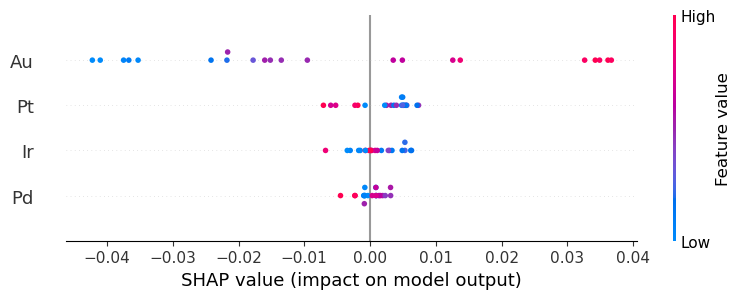

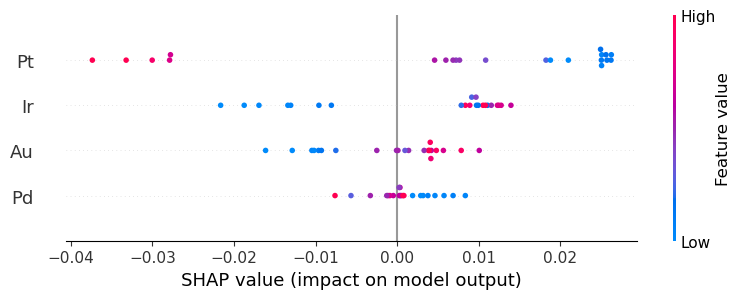

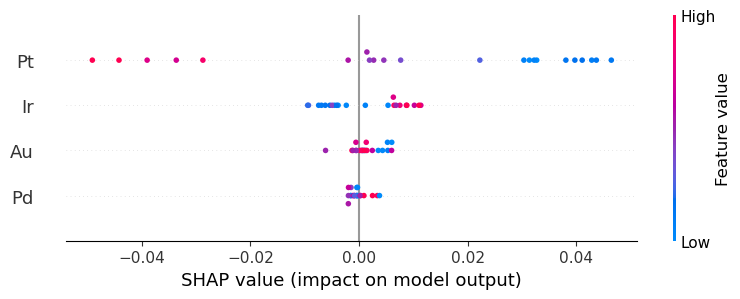

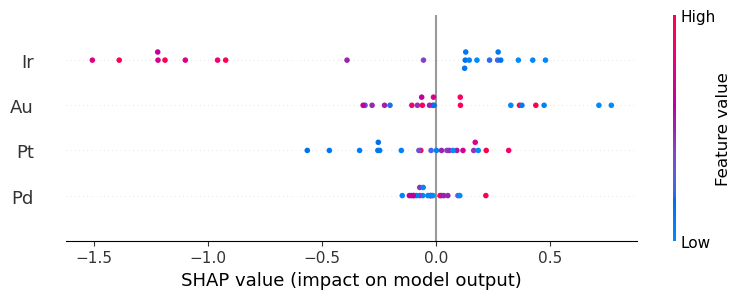

In [18]:
#SHAP Values (SHapley Additive exPlanations)
#We examine each target separately.
'''    Positive SHAP Values:
        Positive SHAP values indicate that the feature value is pushing the model's prediction higher.
        The larger the positive SHAP value, the more the feature contributes to increasing the prediction.

    Negative SHAP Values:
        Negative SHAP values indicate that the feature value is pushing the model's prediction lower.
        The larger the negative SHAP value, the more the feature contributes to decreasing the prediction.
        (For example, if the feature represents a factor associated with lower prices in a pricing model, a
        negative SHAP value indicates that higher values of that feature are associated with lower predicted prices.)

    Magnitude of SHAP Values:
        The magnitude of the SHAP value indicates the strength of the feature's influence on the prediction.
        Features with larger SHAP values have a greater impact on the model's prediction.

    Relative Importance:
        Comparing SHAP values across different features can help determine the relative importance of each feature.
        Features with larger absolute SHAP values are more influential in determining the model's predictions.

    Interactions:
        SHAP values can also reveal interactions between features.
        If the SHAP value of one feature varies depending on the value of another feature, it suggests an interaction between the two features.

    Baseline Value:
        SHAP values are interpreted relative to a baseline value, which is usually the mean prediction of the model.
        Positive SHAP values indicate that the feature value increases the prediction relative to the baseline, while negative SHAP values indicate a decrease relative to the baseline.

    Overall Model Behavior:
        Analyzing SHAP values across multiple instances can provide insights into the overall behavior of the model.
        Aggregating SHAP values across a dataset can reveal which features consistently contribute to higher or lower predictions.'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("RandomForestRegressor")
for i in range(0, len(y_train.columns)):
    model = RandomForestRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/TafelRF"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

DecisionTreeRegressor


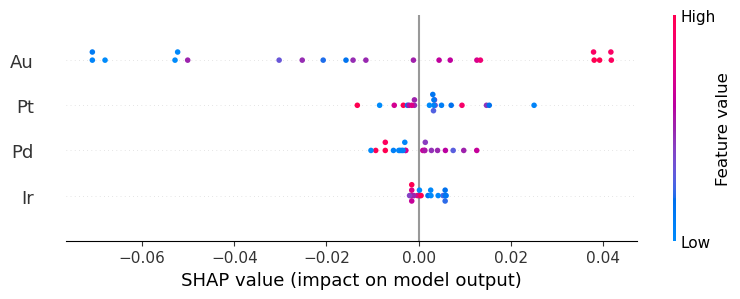

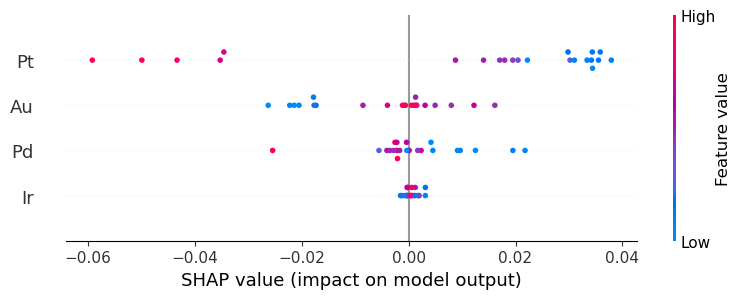

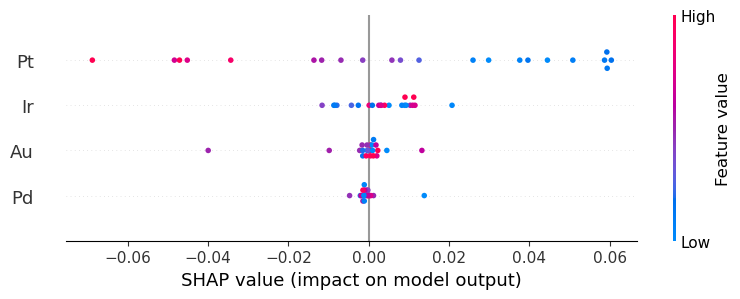

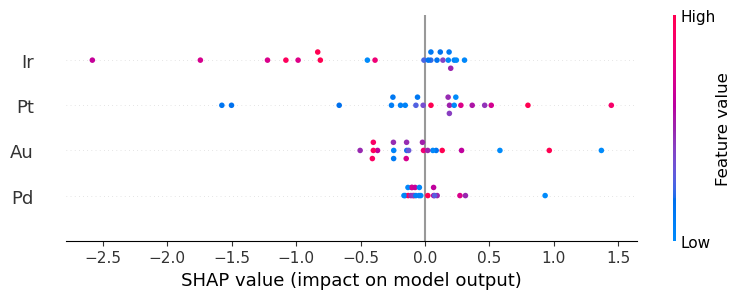

In [19]:
print("DecisionTreeRegressor")
for i in range(0, len(y_train.columns)):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/TafelDT"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

GradientBoostingRegressor


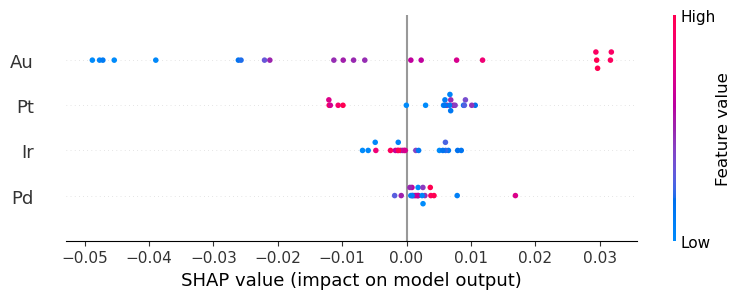

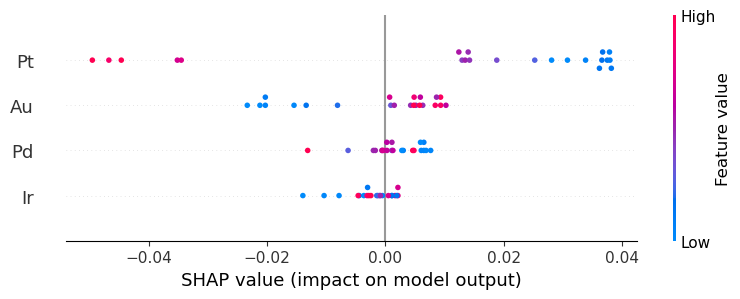

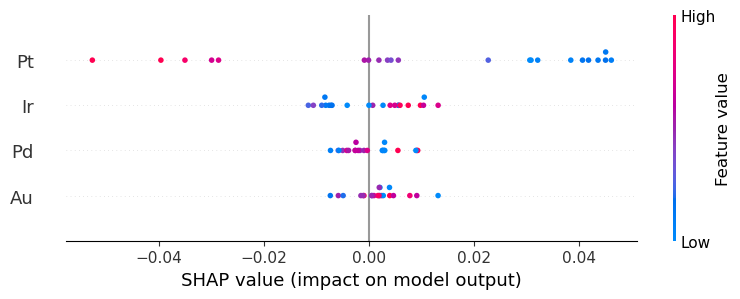

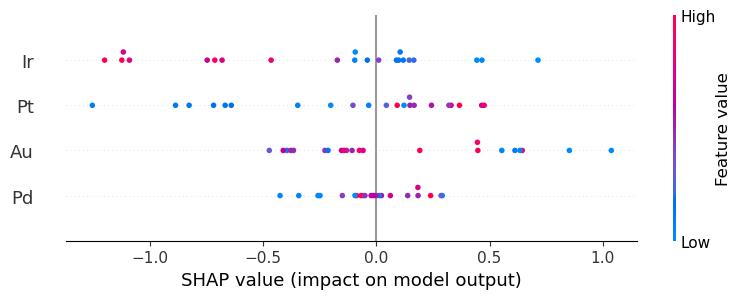

In [20]:
print("GradientBoostingRegressor")
for i in range(0, len(y_train.columns)):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/TafelGB"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

SVR


  0%|          | 0/22 [00:00<?, ?it/s]

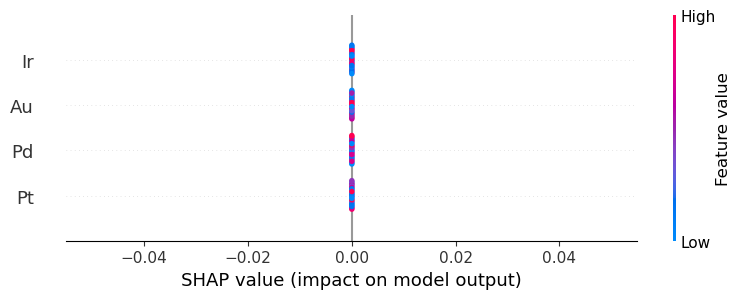

  0%|          | 0/22 [00:00<?, ?it/s]

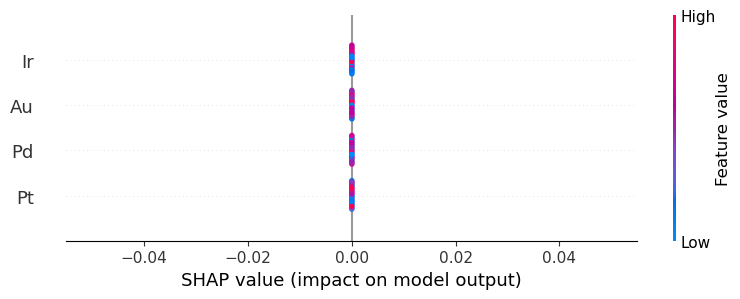

  0%|          | 0/22 [00:00<?, ?it/s]

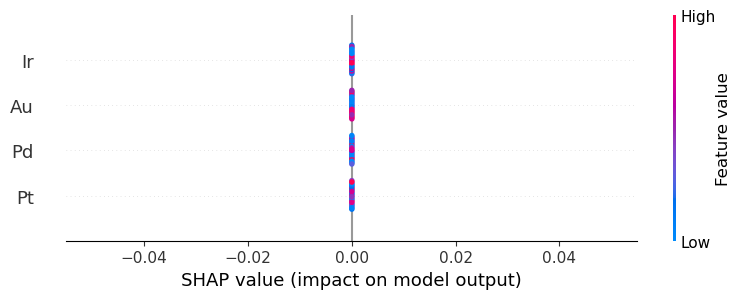

  0%|          | 0/22 [00:00<?, ?it/s]

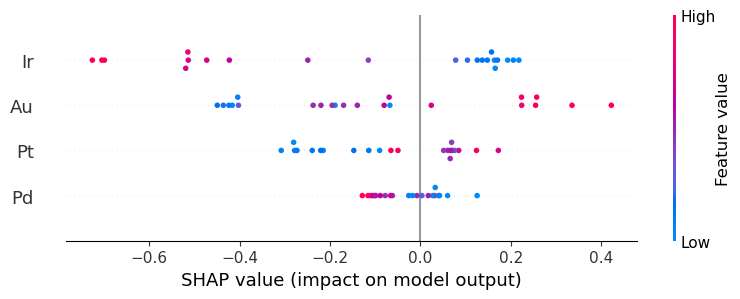

In [21]:
print("SVR")
for i in range(0, len(y_train.columns)):
    model = SVR()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/TafelSVR"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

KNeighborsRegressor


  0%|          | 0/22 [00:00<?, ?it/s]

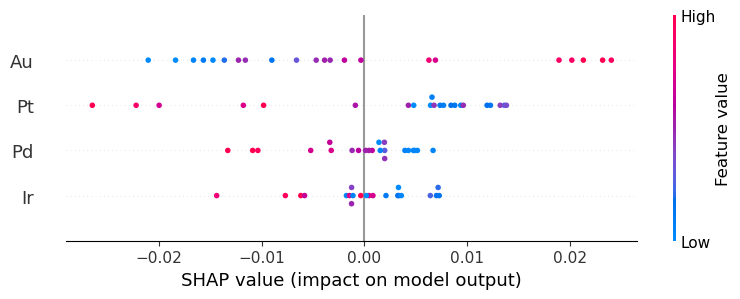

  0%|          | 0/22 [00:00<?, ?it/s]

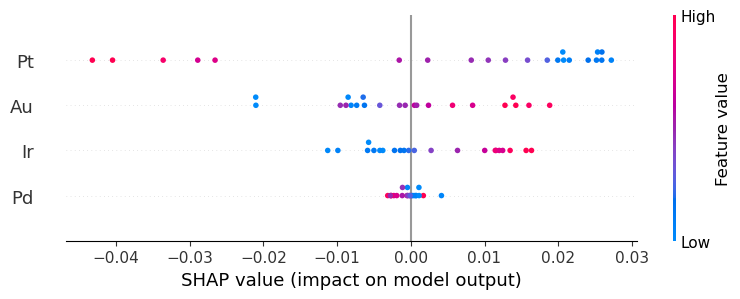

  0%|          | 0/22 [00:00<?, ?it/s]

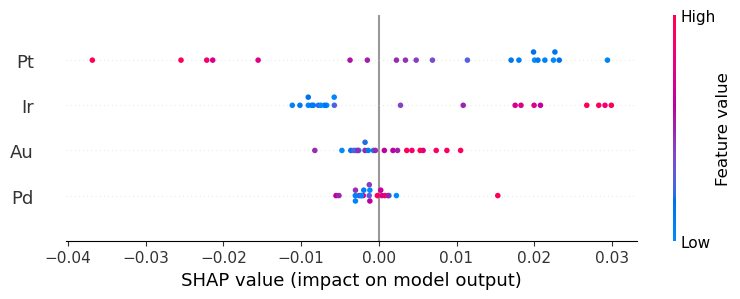

  0%|          | 0/22 [00:00<?, ?it/s]

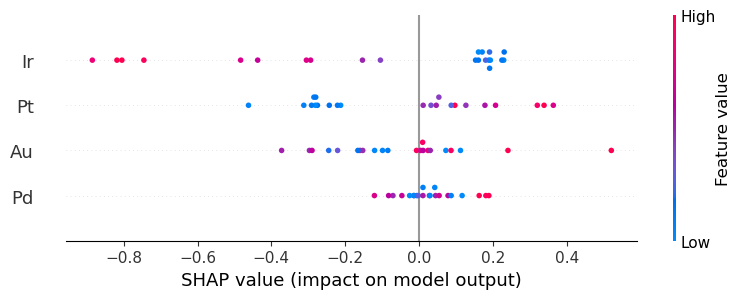

In [22]:
print("KNeighborsRegressor")
for i in range(0, len(y_train.columns)):
    model = KNeighborsRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/TafelKN"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

LinearRegression


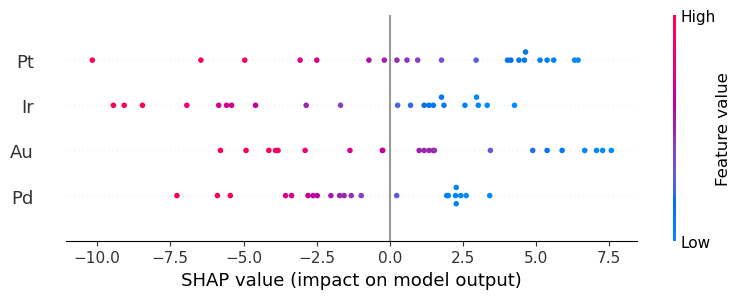

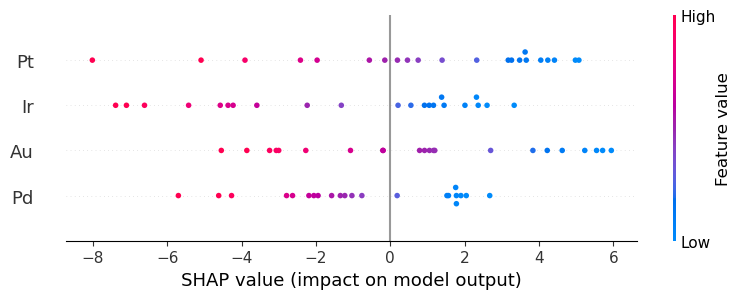

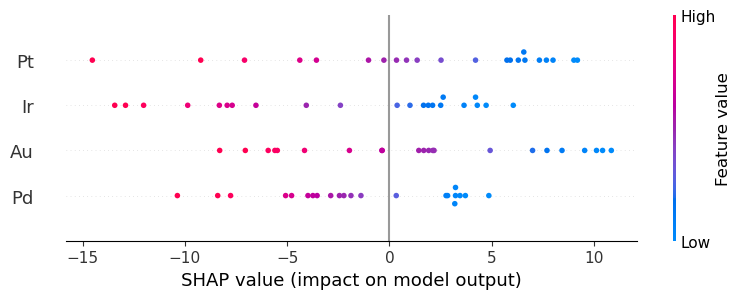

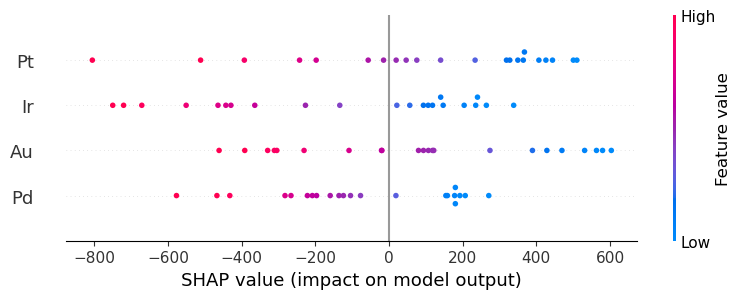

In [23]:
print("LinearRegression")
for i in range(0, len(y_train.columns)):
    model = LinearRegression()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.LinearExplainer(model, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/TafelLinear"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

AdaBoostRegressor


  0%|          | 0/22 [00:00<?, ?it/s]

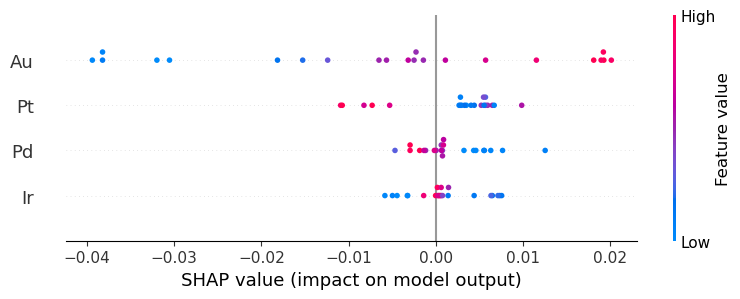

  0%|          | 0/22 [00:00<?, ?it/s]

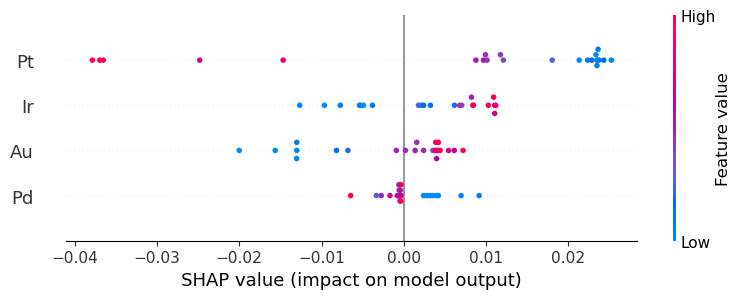

  0%|          | 0/22 [00:00<?, ?it/s]

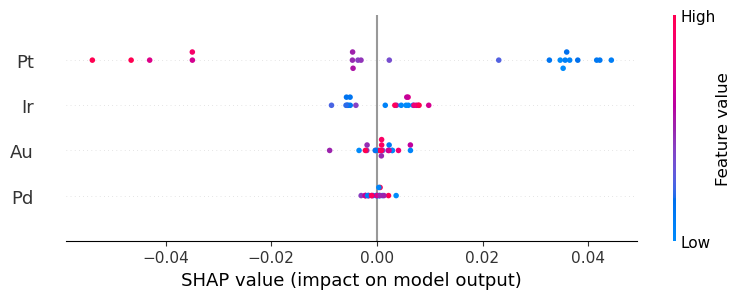

  0%|          | 0/22 [00:00<?, ?it/s]

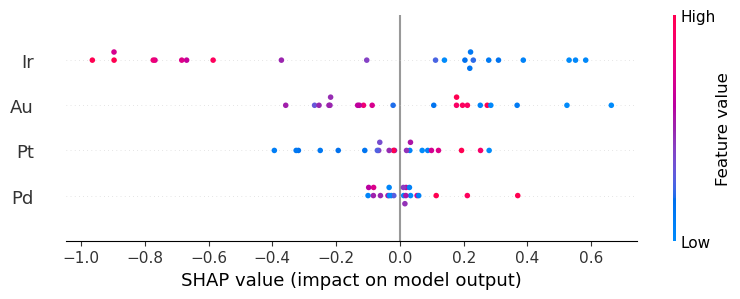

In [24]:
print("AdaBoostRegressor")
for i in range(0, len(y_train.columns)):
    model = AdaBoostRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/TafelAB"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]

RandomForestRegressor
     Oonset    Omax  Tafel slope
0    1.2265  1.3647       4.5752
1    1.1639  1.2883       5.6509
2    1.1973  1.3650       2.6142
3    1.1847  1.3293       2.6156
4    1.1915  1.2952       4.4309
..      ...     ...          ...
995  1.1982  1.3650       2.5356
996  1.2270  1.3113       4.4517
997  1.1573  1.2425       4.9815
998  1.1946  1.3403       3.7043
999  1.1526  1.2362       5.2496

[1000 rows x 3 columns]


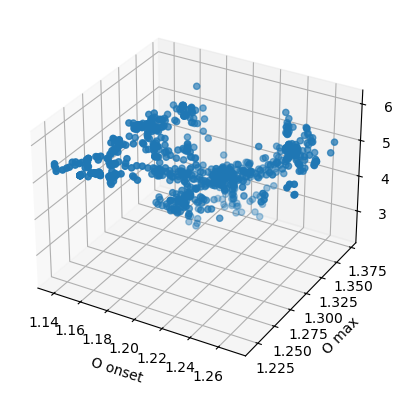

In [31]:
#Random values to determine physical-ness of predictions
np.random.seed(0)
n = 1000
col1 = np.random.rand(n) #rng (0,1)
col2 = np.random.rand(n)*(1-col1)
col3 = np.random.rand(n)*(1-(col1+col2))
col4 = 1-(col1+col2+col3)
data = np.column_stack((col1, col2, col3, col4))
data_test = pd.DataFrame(data)
for index, row in data_test.iterrows():
    data_test.loc[index] = np.random.permutation(row)
data_test.columns = ['Pt', 'Pd', 'Au', 'Ir']
print(data_test)
#print(data_test.sum(axis=1))

modelRF = MultiOutputRegressor(RandomForestRegressor())
modelRF.fit(X, y) # fit on full set of real data
predictions = modelRF.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print("\nRandomForestRegressor")
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.savefig("./plots/PhysicalTafelRF_plot.png", dpi=300)
plt.show()

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]

SVR
     Oonset   Omax  Tafel slope
0     1.195  1.295     4.358764
1     1.195  1.295     4.615489
2     1.195  1.295     3.639378
3     1.195  1.295     4.189027
4     1.195  1.295     4.734874
..      ...    ...          ...
995   1.195  1.295     4.151583
996   1.195  1.295     4.486082
997   1.195  1.295     4.813762
998   1.195  1.295     3.512718
999   1.195  1.295     5.430519

[1000 rows x 3 columns]


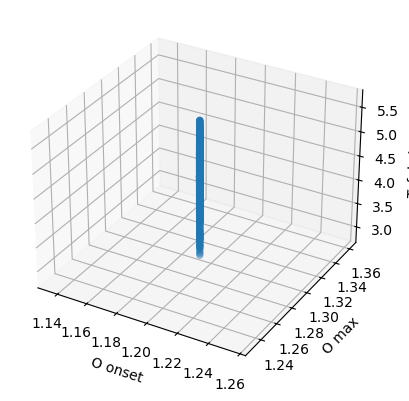

In [32]:
#NOTE: this indicates that the targets Oonset, Omax and Omin do not have enough variance to use SVR
#as a prediction model, despite the fact that it performs well.
print(data_test)

modelSVR = MultiOutputRegressor(SVR())
modelSVR.fit(X, y) # fit on full set of real data
predictions = modelSVR.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print("\nSVR")
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.savefig("./plots/PhysicalTafelSVR_plot.png", dpi=300)
plt.show()

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]

GradientBoostingRegressor
       Oonset      Omax  Tafel slope
0    1.225679  1.362848     5.026545
1    1.159322  1.278312     5.363034
2    1.186818  1.362096     2.680063
3    1.183084  1.307216     2.679949
4    1.189547  1.282953     4.343343
..        ...       ...          ...
995  1.186818  1.362096     2.451855
996  1.195733  1.301684     4.245619
997  1.145640  1.237725     4.696495
998  1.189902  1.341648     3.809241
999  1.136302

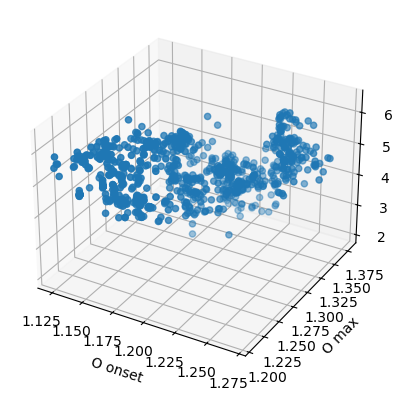

In [33]:
print(data_test)

modelGB = MultiOutputRegressor(GradientBoostingRegressor())
modelGB.fit(X, y) # fit on full set of real data
predictions = modelGB.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print("\nGradientBoostingRegressor")
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.savefig("./plots/PhysicalTafelGB_plot.png", dpi=300)
plt.show()

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]

LinearRegression
       Oonset      Omax  Tafel slope
0    1.239401  1.384216     3.977266
1    1.160853  1.317670     4.750423
2    1.140505  1.344064     1.207076
3    1.132010  1.326841     2.711516
4    1.193541  1.317386     4.878084
..        ...       ...          ...
995  1.118363  1.339874     0.388853
996  1.222509  1.307403     4.809476
997  1.095239  1.136683     3.744936
998  1.161156  1.324496     1.940070
999  1.137289  1.20602

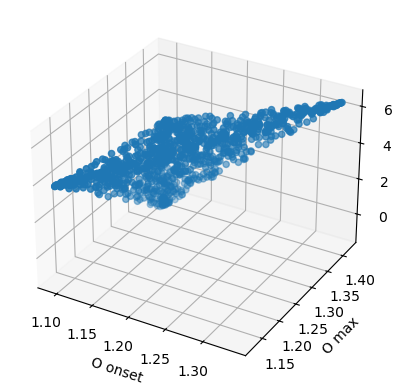

In [34]:
print(data_test)

modelLR = MultiOutputRegressor(LinearRegression())
modelLR.fit(X, y) # fit on full set of real data
predictions = modelLR.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print("\nLinearRegression")
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.savefig("./plots/PhysicalTafelLinear_plot.png", dpi=300)
plt.show()

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]

DecisionTreeRegressor
     Oonset  Omax  Tafel slope
0      1.23  1.37         4.38
1      1.14  1.28         5.58
2      1.20  1.35         2.75
3      1.20  1.28         2.12
4      1.18  1.28         3.48
..      ...   ...          ...
995    1.20  1.35         2.75
996    1.25  1.31         4.88
997    1.12  1.20         4.46
998    1.20  1.33         2.91
999    1.12  1.20         5.73

[1000 rows x 3 columns]


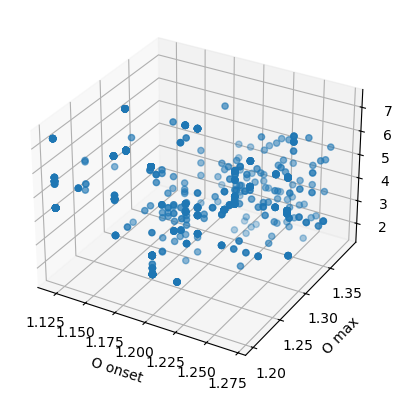

In [35]:
print(data_test)

modelDT = MultiOutputRegressor(DecisionTreeRegressor())
modelDT.fit(X, y) # fit on full set of real data
predictions = modelDT.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print("\nDecisionTreeRegressor")
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.savefig("./plots/PhysicalTafelDT_plot.png", dpi=300)
plt.show()

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]

KNeighborsRegressor
     Oonset   Omax  Tafel slope
0     1.222  1.370        3.526
1     1.176  1.300        5.156
2     1.196  1.362        2.732
3     1.192  1.362        2.836
4     1.176  1.300        5.156
..      ...    ...          ...
995   1.196  1.362        2.732
996   1.222  1.318        4.410
997   1.166  1.244        5.324
998   1.202  1.360        3.158
999   1.166  1.244        5.324

[1000 rows x 3 columns]


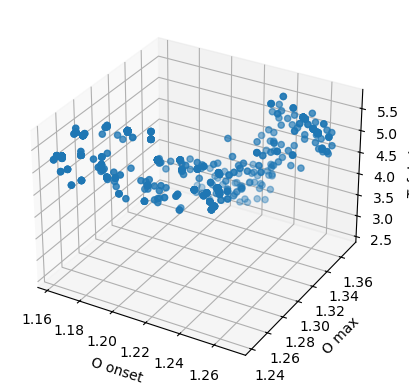

In [36]:
print(data_test)

modelKN = MultiOutputRegressor(KNeighborsRegressor())
modelKN.fit(X, y) # fit on full set of real data
predictions = modelKN.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print("\nKNeighborsRegressor")
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.savefig("./plots/PhysicalTafelKN_plot.png", dpi=300)
plt.show()

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]

AdaBoostRegressor
       Oonset      Omax  Tafel slope
0    1.231290  1.365946     4.480000
1    1.171935  1.280000     5.402000
2    1.190909  1.364000     2.516364
3    1.180000  1.340000     2.806000
4    1.195769  1.288571     4.501786
..        ...       ...          ...
995  1.190909  1.364000     2.452381
996  1.220000  1.293548     4.558929
997  1.160000  1.260000     4.501786
998  1.193333  1.346667     3.507297
999  1.148214  1.2325

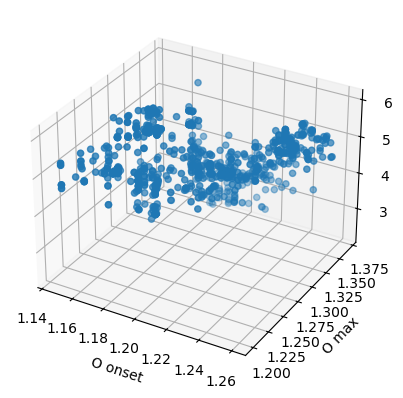

In [37]:
print(data_test)

modelAB = MultiOutputRegressor(AdaBoostRegressor())
modelAB.fit(X, y) # fit on full set of real data
predictions = modelAB.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print("\nAdaBoostRegressor")
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.savefig("./plots/PhysicalTafelAB_plot.png", dpi=300)
plt.show()

In [20]:
#Tafel plot to Overpotential relationships
df = pd.read_csv('PtPdAuIr_tafel.csv')
unwanted_columns = ['Run #', 'Sample #', 'iR drop (Ω)','Pt', 'Pd', 'Au', 'Ir']
df = df.drop(unwanted_columns, axis=1)
df = df.dropna()
print(df)

selected_columns_X = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
X = df[selected_columns_X]
selected_columns_y = ['overP0']
y = df[selected_columns_y]

     Oonset  Omax  Omin  Tafel slope    overP0
0      1.17  1.26  1.41         5.56  0.651685
1      1.18  1.28  1.43         5.05  0.612874
2      1.19  1.34  1.44         4.00  0.566532
3      1.20  1.34  1.46         3.70  0.547118
4      1.20  1.35  1.48         3.34  0.516503
..      ...   ...   ...          ...       ...
102    1.27  1.36  1.46         5.82  0.727464
103    1.23  1.36  1.51         4.31  0.580117
104    1.24  1.37  1.48         5.62  0.611273
105    1.20  1.37  1.52         4.19  0.603785
106    1.19  1.27  1.41         4.67  0.747826

[99 rows x 5 columns]


In [21]:
#Test ML models for Tafel to Overpotential relationship
linear=0; rf=0; dt=0; knn=0; svr=0; gb=0; ab = 0;
#n-fold mse
n = 20
for i in range (0,n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create a multioutput regression model
    modelLinear = MultiOutputRegressor(LinearRegression())
    modelLinear.fit(X_train, y_train)
    predictions = modelLinear.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    linear+= mse
    #print(f'Mean Squared Error (Linear): {mse}')

    # Create a multioutput regression model
    modelRF = MultiOutputRegressor(RandomForestRegressor())
    modelRF.fit(X_train, y_train)
    predictions = modelRF.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    rf+=mse
    #print(f'Mean Squared Error (RF): {mse}')

    # Create a multioutput regression model
    modelDT = MultiOutputRegressor(DecisionTreeRegressor())
    modelDT.fit(X_train, y_train)
    predictions = modelDT.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    dt+=mse
    #print(f'Mean Squared Error (DT): {mse}')

    # Create a multioutput regression model
    modelKNN = MultiOutputRegressor(KNeighborsRegressor())
    modelKNN.fit(X_train, y_train)
    predictions = modelKNN.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    knn+=mse
    #print(f'Mean Squared Error (KNN): {mse}')

    # Create a multioutput regression model
    modelSVR = MultiOutputRegressor(SVR())
    modelSVR.fit(X_train, y_train)
    predictions = modelSVR.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    svr+=mse
    #print(f'Mean Squared Error (SVR): {mse}')

    # Create a multioutput regression model
    modelGB = MultiOutputRegressor(GradientBoostingRegressor())
    modelGB.fit(X_train, y_train)
    predictions = modelGB.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    gb+=mse
    #print(f'Mean Squared Error (GB): {mse}')

    # Create a multioutput regression model
    modelAB = MultiOutputRegressor(AdaBoostRegressor())
    modelAB.fit(X_train, y_train)
    predictions = modelAB.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    ab+=mse
    #print(f'Mean Squared Error (AB): {mse}')

print("Tafel to Overpotential relationship.")
print("Lower error means a better fit.")
print(f'Mean Squared Error (Linear): {linear/n}')
print(f'Mean Squared Error (RF): {rf/n}')
print(f'Mean Squared Error (DT): {dt/n}')
print(f'Mean Squared Error (KNN): {knn/n}')
print(f'Mean Squared Error (SVR): {svr/n}')
print(f'Mean Squared Error (GB): {gb/n}')
print(f'Mean Squared Error (AB): {ab/n}')

Tafel to Overpotential relationship.
Lower error means a better fit.
Mean Squared Error (Linear): 0.0017444296966861949
Mean Squared Error (RF): 0.0018247787124306698
Mean Squared Error (DT): 0.0028746989239644034
Mean Squared Error (KNN): 0.004005694981123592
Mean Squared Error (SVR): 0.0039336272907143045
Mean Squared Error (GB): 0.0018570947917590861
Mean Squared Error (AB): 0.0018499393060938715


In [22]:
#Linear Correlation analysis (Pearson) for Tafel to Overpotential
'''Positive values indicate a positive correlation, negative values indicate a negative correlation, 
and values close to zero indicate low correlation.'''
df = pd.concat([X, y], axis=1)
#.T to ensure that the correlation is calculated between the columns (features) instead of rows.
'''Extracts the correlations between features and targets. Assuming 'y' is a 2D array or DataFrame
representing target variables, y.shape[1] gives the number of target variables. The indexing -y.shape[1]:
refers to the last rows of the correlation matrix, corresponding to the targets, and :-y.shape[1]
refers to all columns except the last ones, which correspond to the features.'''
correlation_matrix = np.corrcoef(df.values.T)
#linear corrcoef
'''    1 indicates a perfect positive linear correlation,
    0 indicates no linear correlation (independence),
    -1 indicates a perfect negative linear correlation.'''
correlations_with_targets = correlation_matrix[-y.shape[1]:, :-y.shape[1]]
results_df = pd.DataFrame({'Feature': X.columns})
for i in range(y.shape[1]):
    results_df[f'Correlation with Target{i+1}'] = correlations_with_targets[i]

print(results_df)

       Feature  Correlation with Target1
0       Oonset                  0.137807
1         Omax                 -0.468027
2         Omin                 -0.660156
3  Tafel slope                  0.429678Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



In [23]:
#Distance correlation, to capture any nonlinear correlations [Tafel to Overpotential]
features = X.values
targets = y.values

# Compute distance correlation between each feature and each target
for i in range(features.shape[1]):
    for j in range(targets.shape[1]):
        dcorr = dcor.distance_correlation(features[:, i], targets[:, j])
        print(f"Distance correlation between feature {i+1} and target {j+1}: {dcorr}")

Distance correlation between feature 1 and target 1: 0.2879040988187854
Distance correlation between feature 2 and target 1: 0.47274618164309484
Distance correlation between feature 3 and target 1: 0.6639515527149749
Distance correlation between feature 4 and target 1: 0.46212155023510404



[Tafel to Overpotential]
RandomForestRegressor


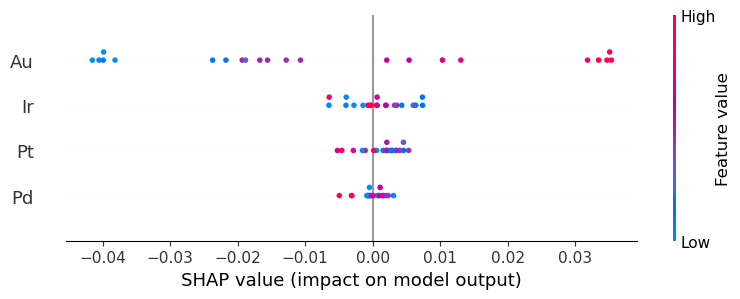

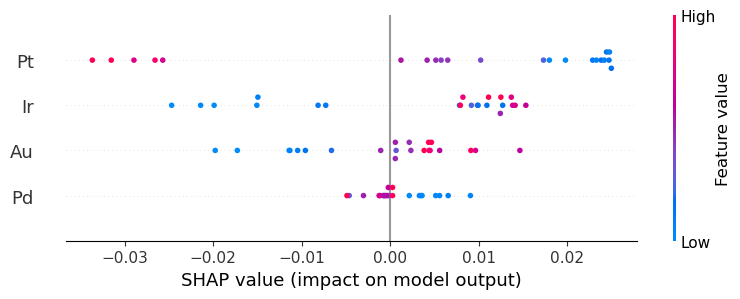

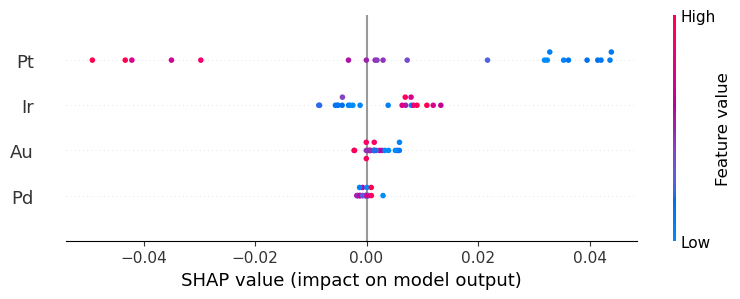

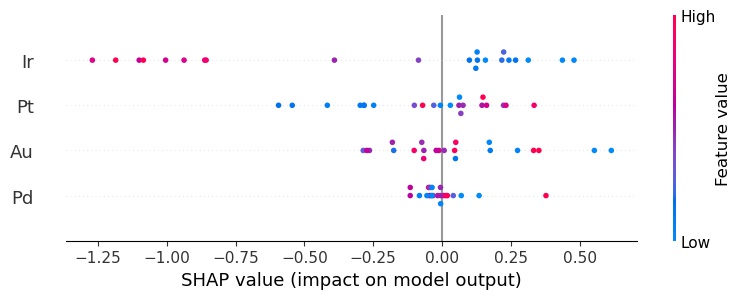

DecisionTreeRegressor


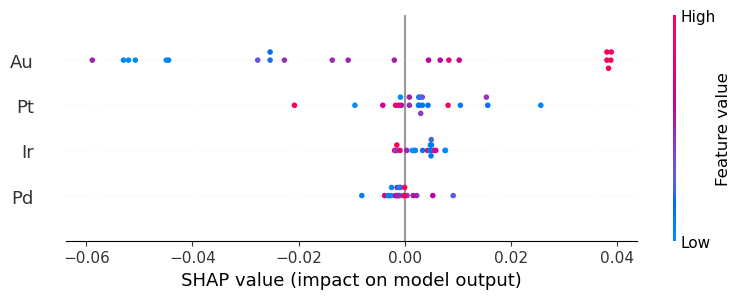

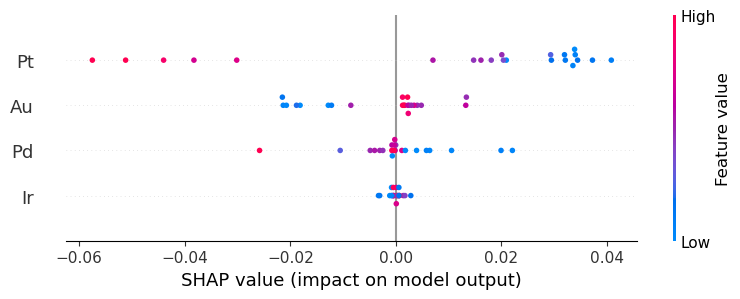

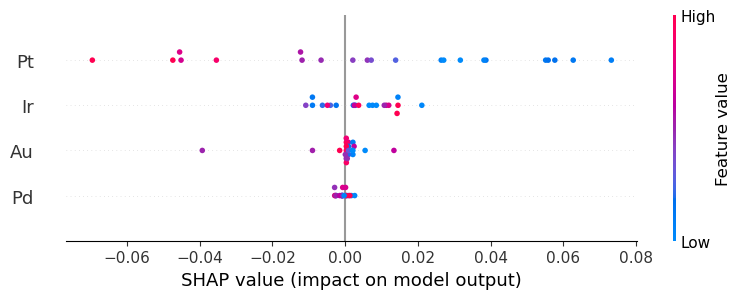

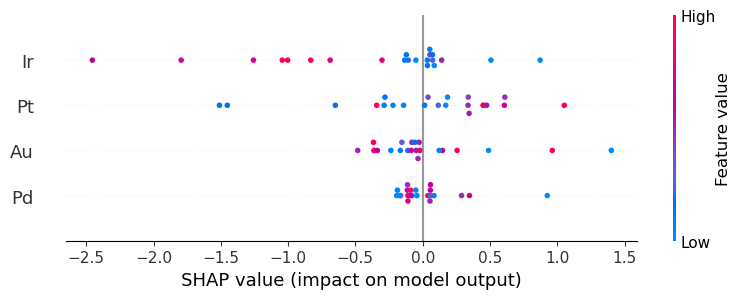

GradientBoostingRegressor


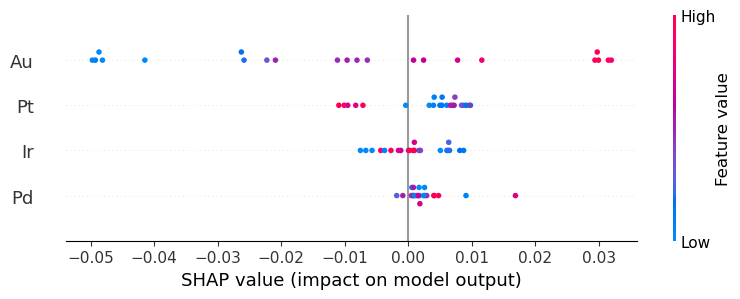

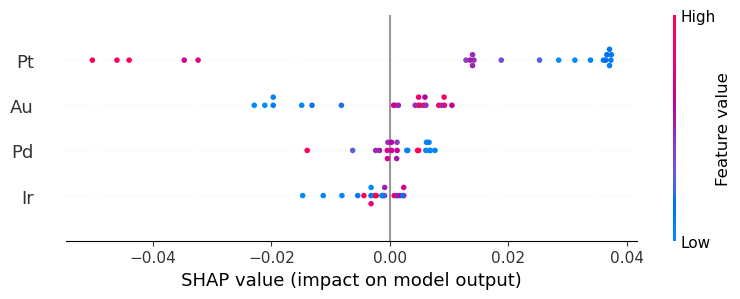

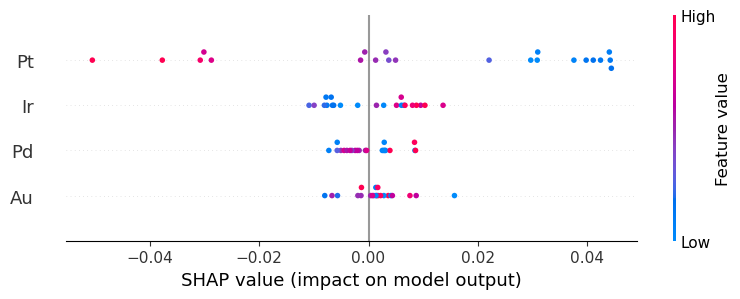

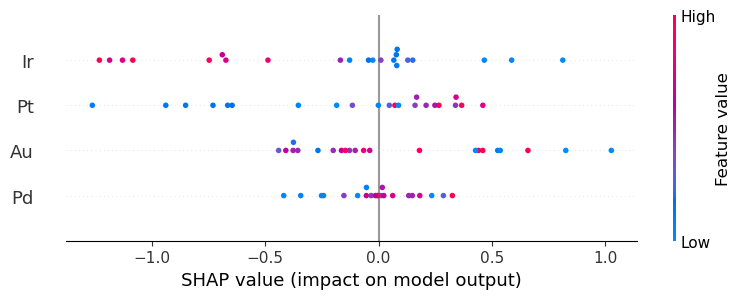

LinearRegression


  0%|          | 0/22 [00:00<?, ?it/s]

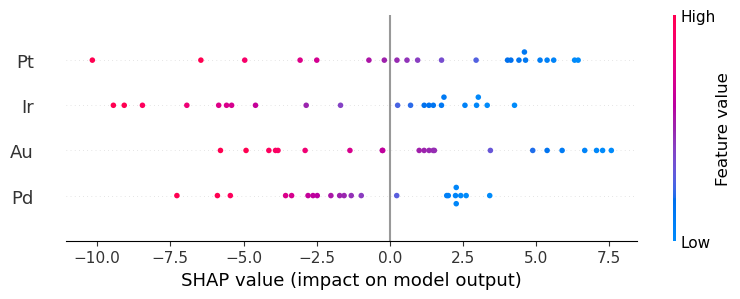

  0%|          | 0/22 [00:00<?, ?it/s]

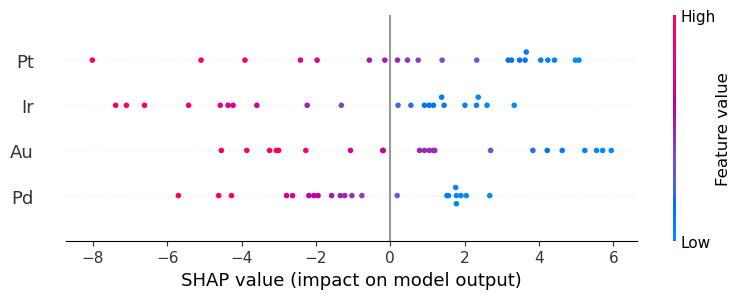

  0%|          | 0/22 [00:00<?, ?it/s]

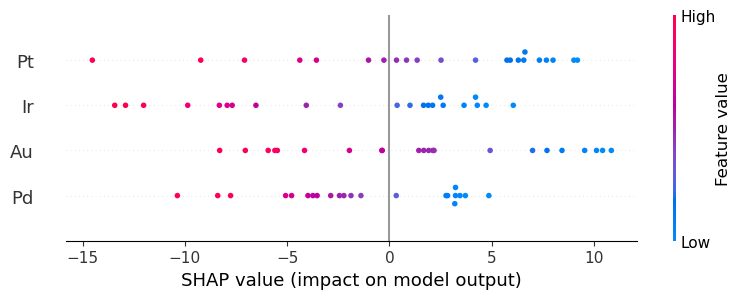

  0%|          | 0/22 [00:00<?, ?it/s]

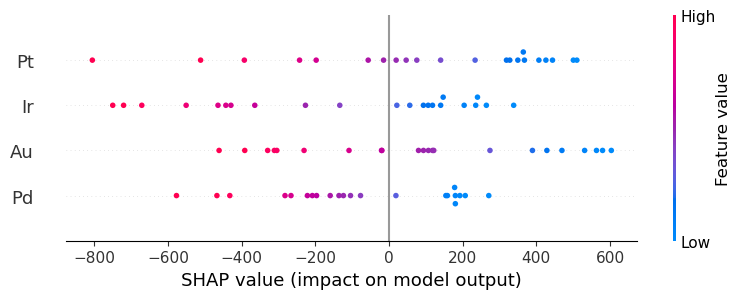

KNeighborsRegressor


  0%|          | 0/22 [00:00<?, ?it/s]

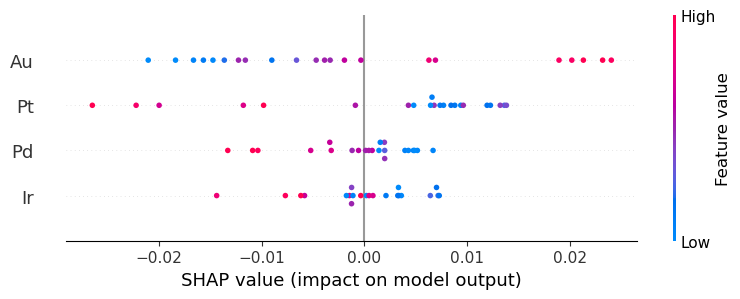

  0%|          | 0/22 [00:00<?, ?it/s]

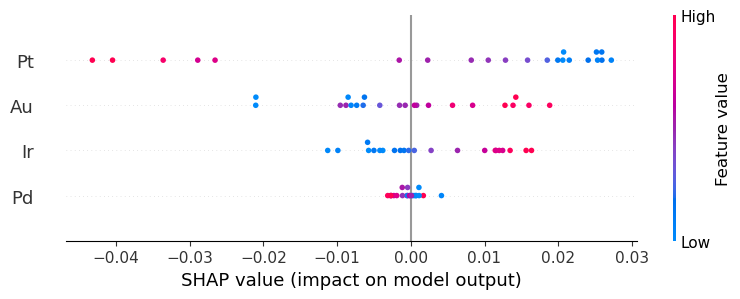

  0%|          | 0/22 [00:00<?, ?it/s]

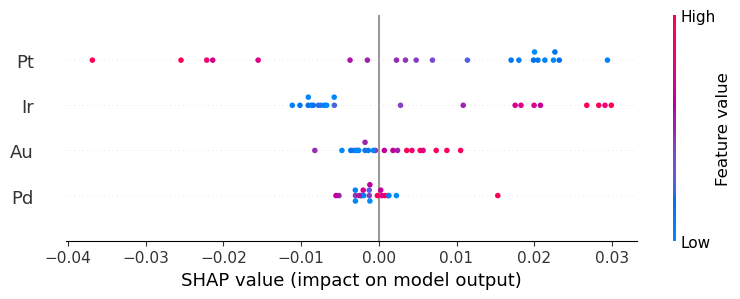

  0%|          | 0/22 [00:00<?, ?it/s]

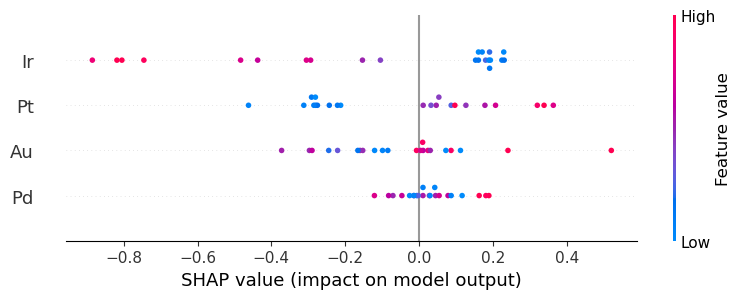

AdaBoostRegressor


  0%|          | 0/22 [00:00<?, ?it/s]

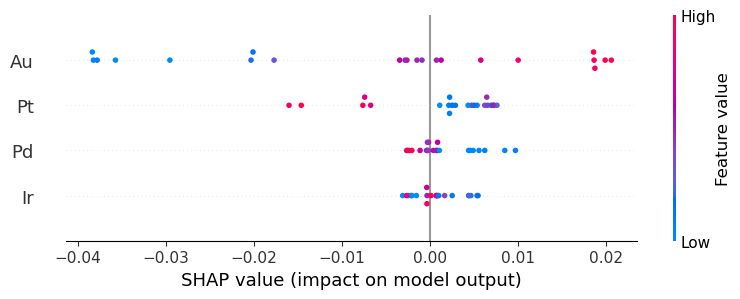

  0%|          | 0/22 [00:00<?, ?it/s]

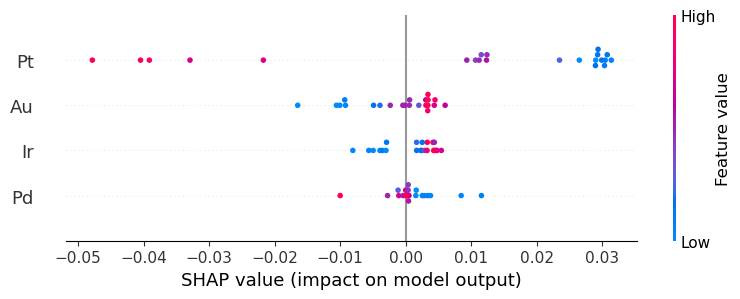

  0%|          | 0/22 [00:00<?, ?it/s]

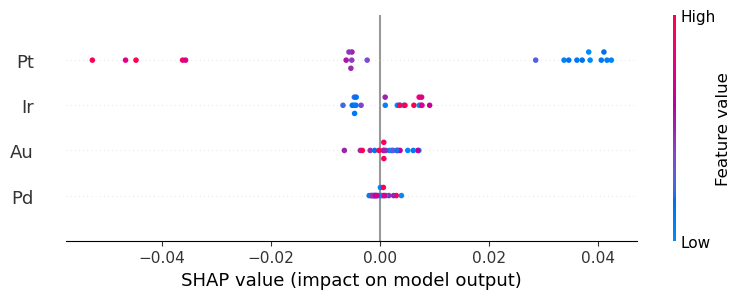

  0%|          | 0/22 [00:00<?, ?it/s]

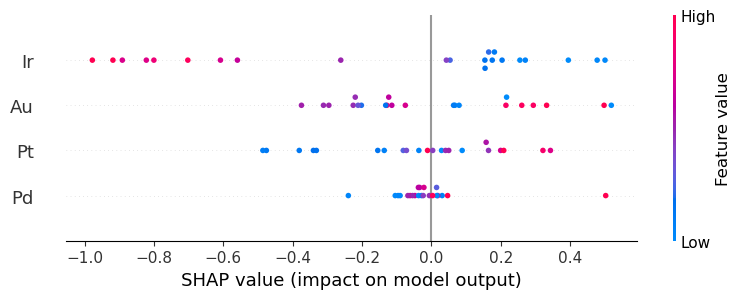

SVR


  0%|          | 0/22 [00:00<?, ?it/s]

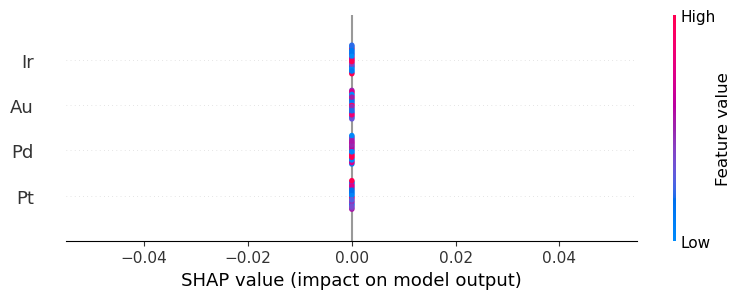

  0%|          | 0/22 [00:00<?, ?it/s]

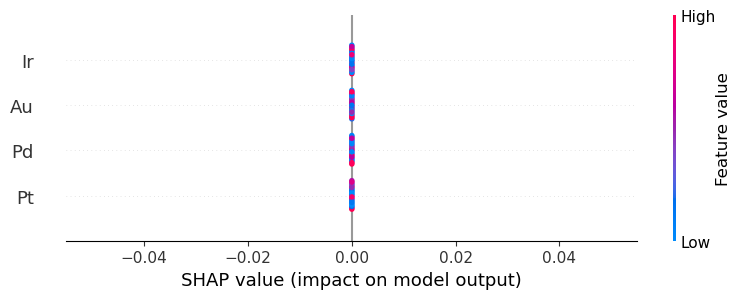

  0%|          | 0/22 [00:00<?, ?it/s]

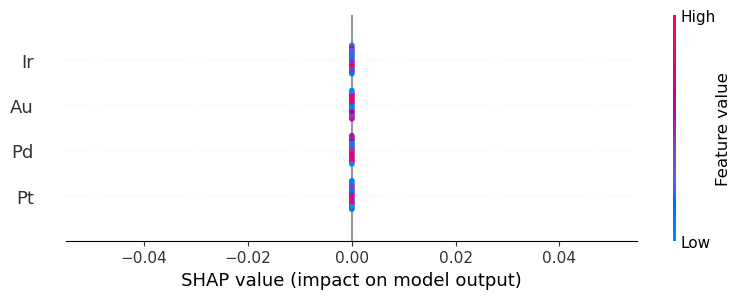

  0%|          | 0/22 [00:00<?, ?it/s]

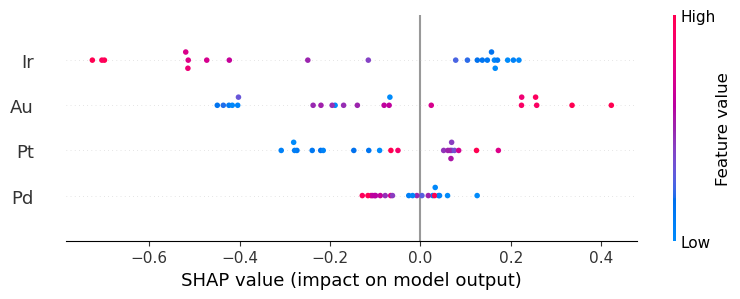

In [38]:
print("\n[Tafel to Overpotential]")
print("RandomForestRegressor")
for i in range(0, len(y_train.columns)):
    model = RandomForestRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/OP-RF"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

print("DecisionTreeRegressor")
for i in range(0, len(y_train.columns)):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/OP-DT"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

print("GradientBoostingRegressor")
for i in range(0, len(y_train.columns)):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/OP-GB"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

print("LinearRegression")
for i in range(0, len(y_train.columns)):
    model = LinearRegression()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/OP-Linear"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

print("KNeighborsRegressor")
for i in range(0, len(y_train.columns)):
    model = KNeighborsRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/OP-KN"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

print("AdaBoostRegressor")
for i in range(0, len(y_train.columns)):
    model = AdaBoostRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/OP-AB"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)

print("SVR")
for i in range(0, len(y_train.columns)):
    model = SVR()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.savefig("./plots/OP-SVR"+str(i)+"_plot.png", dpi=300)
    plt.close(fig)